# Data Mining Final Project - Notebook 1
### Datasets :
   > ### Car Evaluation Dataset
   > ### Wine Quality Dataset (White)
### Authors:
> ### Francisco Cunha, 76759
> ### João Amaral, 76460

The following notebook containts the development stages of the analysis and classifier modeling of a dataset, done for the final project of the course 44152 - Data Mining at University of Aveiro.
The project requested that the students selected two different datasets and apply common data mining techniques in order to extract patterns and predict behavior in the studied data (train classifiers). The students were required to freely select two datasets to develop the project, the only restriction being one of them had to contain some sort of categorical attributes. The first dataset chosen was the the Car Evaluation Dataset, containing categorical attributes, which is available at https://archive.ics.uci.edu/ml/datasets/Car+Evaluation. The second dataset chosen was the Wine Quality Dataset, available at https://archive.ics.uci.edu/ml/datasets/Wine+Quality. It contains two datasets one for red and other for white whine. The white wine one was then chosen.

The assignment of the project required the delivery of two notebooks, one containing only the data pre-processing and classifier modeling for both chosen datasets, while the second contains the complete processing including a cross validation scheme implementation and the justification for its selection.

This notebook corresponds to the first one, and as such, the notebook is then divided into 2 main stages, corresponding to the data mining stages we already studied in the theorethical classes:
    - Task A : Pre-processing stage
    - Task B : Training model stage
    
In order to ease the reading of the notebook, both tasks were applied separately to each dataset and here displayed in two separate sections:
- [Dataset 1: Car Evaluation Dataset](#Dataset-1-:-Car-Evaluation-Dataset)
    - [Task A: Car Pre-processing](#Task-A:-Car-Pre-processing)
    - [Task B: Car Model training](#Task-B:-Car-Model-training)
- [Dataset 2: White wine quality dataset](#Dataset-2-:-White-wine-quality-dataset)
    - [Task A: Wine Pre-processing](#Task-A:-Wine-Pre-processing)
    - [Task B: Wine Model Training](#Task-B:-Wine-Model-Training)

# Dataset 1 : Car Evaluation Dataset
## Task A: Car Pre-processing 

- [Car CSV's File Reading](#Car-CSV's-File-Reading)
- [Car Attributes and classes sample values](#Car-Attributes-and-classes-sample-values)
- [Car Mapping categorical attributes to numeric](#Car-Mapping-categorial-attributes-to-numeric)
- [Car Class distribution visualization](#Car-Class-distribution-visualization)
- [Car Dataset detailed description](#Car-Dataset-detailed-description)
- [Car Attribute and class plotting examples](#Car-Attribute-and-class-plotting-examples)
- [Car Correlation matrix heatmap](#Car-Correlation-matrix-heatmap)
- [Car Feature ranking (Shapiro-Wilk)](#Car-Feature-ranking-(Shapiro-Wilk))
- [Car Feature scaling](#Car-Feature-scaling)
- [Car Dimension reduction](#Car-Dimension-reduction)
    - [Car Principal Component Analysis (PCA)](#Car-Principal-Component-Analysis-(PCA))
    - [Car Kernel PCA](#Car-Kernel-PCA)

### Car CSV's File Reading

In [1]:
import os
import pandas as pd
from pandas import DataFrame

#Disable warning
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# Load dataframes from data set CSV files
dataset_car = pd.read_csv('./car.csv') # categorical: https://archive.ics.uci.edu/ml/datasets/Car+Evaluation

### Car Attributes and classes sample values

In [2]:
dataset_car.head() # shows only the first 5 instances on the data set

,buying,maint,doors,persons,lug_boot,safety,class values
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


### Car Mapping categorical attributes to numeric

In [3]:
# Dictionary containing the mapping to be done in order 
# to convert categorical attributes to numeric ones
# Not the most efficient method but we decide to which
# numerical value each attribue will be converted to
numeric_map = {
	'buying' : { 'low' : 1, 'med' : 2, 'high' : 3, 'vhigh': 4 },
	'maint' : {'low' : 1, 'med' : 2, 'high' : 3, 'vhigh': 4 },
	'doors' : { '2' : 1, '3' : 2, '4' : 3, '5more' : 4 },
	'persons' : {'2' : 1, '4' : 2, 'more' : 3 },
	'lug_boot' : {'small' : 1,'med': 2, 'big': 3 },
	'safety' : {'low' : 1, 'med' : 2, 'high': 3 }
}

for m in numeric_map:
	dataset_car[m] = dataset_car[m].map(numeric_map[m])

# classes values mapping to numeric values
dataset_car['class values'].replace(('unacc','acc','good','vgood'),(1,2,3,4), inplace=True)

dataset_car.head()

,buying,maint,doors,persons,lug_boot,safety,class values
0,4,4,1,1,1,1,1
1,4,4,1,1,1,2,1
2,4,4,1,1,1,3,1
3,4,4,1,1,2,1,1
4,4,4,1,1,2,2,1


In [4]:
'''
#https://www.kaggle.com/behzadmehmood82/classification?fbclid=IwAR1XUBK2puSh0zeepES3vx6FQT05VVXYi17pVBTpHaB5bqdwuTlD01WYSEM
#SEGUNDO ESTE LINK É ASSIM QUE SE FAZ O MAPEAMENTO

cleanup_nums = {"class values": {"unacc": 4, "acc": 3,'good': 2,'vgood':1}}
dataset_car.replace(cleanup_nums,inplace = True)

Y_car = dataset_car['class values']
dataset_car.drop( ['class values'],axis = 1,inplace = True)
Y_car.head()

X_car = pd.get_dummies(dataset_car)
X_car.head()
'''

'\n#https://www.kaggle.com/behzadmehmood82/classification?fbclid=IwAR1XUBK2puSh0zeepES3vx6FQT05VVXYi17pVBTpHaB5bqdwuTlD01WYSEM\n#SEGUNDO ESTE LINK É ASSIM QUE SE FAZ O MAPEAMENTO\n\ncleanup_nums = {"class values": {"unacc": 4, "acc": 3,\'good\': 2,\'vgood\':1}}\ndataset_car.replace(cleanup_nums,inplace = True)\n\nY_car = dataset_car[\'class values\']\ndataset_car.drop( [\'class values\'],axis = 1,inplace = True)\nY_car.head()\n\nX_car = pd.get_dummies(dataset_car)\nX_car.head()\n'

### Car Class distribution visualization

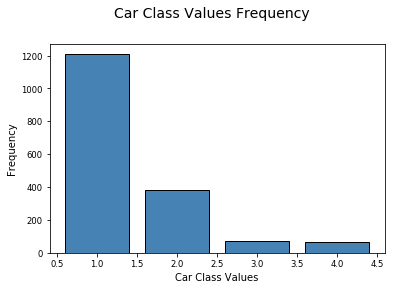

In [5]:
%matplotlib inline 
import matplotlib.pyplot as plt 

fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Car Class Values Frequency", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Car Class Values")
ax.set_ylabel("Frequency") 
car_cv = dataset_car['class values'].value_counts()
#car_cv = Y_car.value_counts()
car_cv = (list(car_cv.index), list(car_cv.values))
ax.tick_params(axis='both', which='major', labelsize=8.5)
bar = ax.bar(car_cv[0], car_cv[1], color='steelblue', 
        edgecolor='black', linewidth=1)

#plt.hist(dataset_car['class values'])
#plt.title('Car dataset class distribution')
#plt.show()

### Car Dataset detailed description

Dataset description
              buying        maint        doors      persons     lug_boot  \
count  1728.000000  1728.000000  1728.000000  1728.000000  1728.000000   
mean      2.500000     2.500000     2.500000     2.000000     2.000000   
std       1.118358     1.118358     1.118358     0.816733     0.816733   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%       1.750000     1.750000     1.750000     1.000000     1.000000   
50%       2.500000     2.500000     2.500000     2.000000     2.000000   
75%       3.250000     3.250000     3.250000     3.000000     3.000000   
max       4.000000     4.000000     4.000000     3.000000     3.000000   

            safety  class values  
count  1728.000000   1728.000000  
mean      2.000000      1.414931  
std       0.816733      0.740700  
min       1.000000      1.000000  
25%       1.000000      1.000000  
50%       2.000000      1.000000  
75%       3.000000      2.000000  
max       3.000000      4.00000

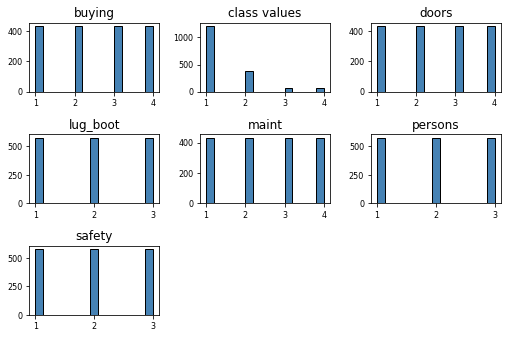

In [6]:
print("Dataset description\n ", dataset_car.describe())
print()

dataset_car.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,xlabelsize=8, ylabelsize=8, grid=False)
plt.tight_layout(rect=(0, 0, 1.2, 1.2))

### Car Attribute and class plotting examples

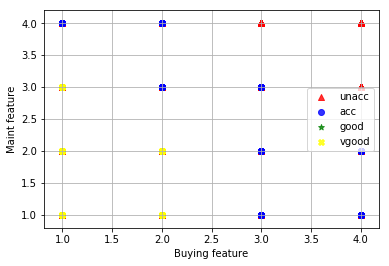

In [7]:
labels_car = dataset_car.as_matrix(columns=[dataset_car.columns[-1]]) # Y
attributes_car = dataset_car.as_matrix(columns=dataset_car.columns[0:6]) # X
labels_car = labels_car.reshape(labels_car.size)

plt.scatter(attributes_car[labels_car==1, 0],attributes_car[labels_car==1,1], color='red', marker='^', alpha=0.8)
plt.scatter(attributes_car[labels_car==2, 0],attributes_car[labels_car==2,1], color='blue', marker='o', alpha=0.8)
plt.scatter(attributes_car[labels_car==3, 0],attributes_car[labels_car==3,1], color='green', marker='*', alpha=0.8)
plt.scatter(attributes_car[labels_car==4, 0],attributes_car[labels_car==4,1], color='yellow', marker='X', alpha=0.8)
plt.xlabel("Buying feature")
plt.ylabel("Maint feature")
plt.legend(["unacc", "acc", "good", "vgood"])
plt.grid()
plt.show()

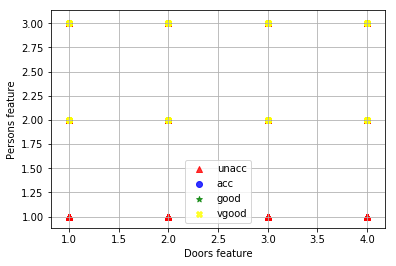

In [8]:
plt.scatter(attributes_car[labels_car==1, 2],attributes_car[labels_car==1,3], color='red', marker='^', alpha=0.8)
plt.scatter(attributes_car[labels_car==2, 2],attributes_car[labels_car==2,3], color='blue', marker='o', alpha=0.8)
plt.scatter(attributes_car[labels_car==3, 2],attributes_car[labels_car==3,3], color='green', marker='*', alpha=0.8)
plt.scatter(attributes_car[labels_car==4, 2],attributes_car[labels_car==4,3], color='yellow', marker='X', alpha=0.8)
plt.xlabel("Doors feature")
plt.ylabel("Persons feature")
plt.legend(["unacc", "acc", "good", "vgood"])
plt.grid()
plt.show()

### Car Correlation matrix heatmap

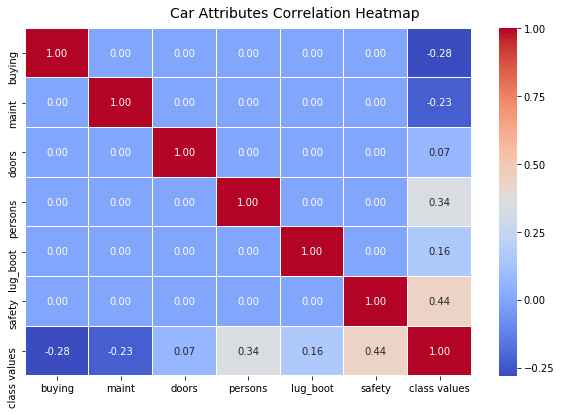

In [9]:
import seaborn as sns

# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(10, 6))
corr = dataset_car.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Car Attributes Correlation Heatmap', fontsize=14)

### Car Feature ranking (Shapiro-Wilk)

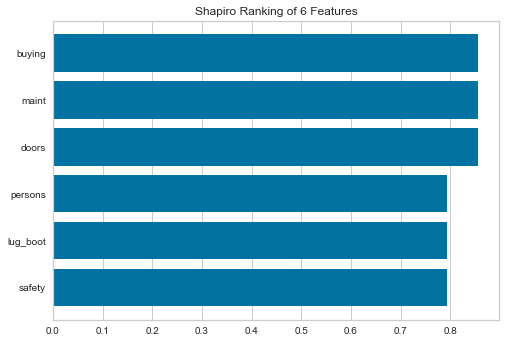

In [10]:
'''
# https://machinelearningmastery.com/feature-selection-machine-learning-python/
from sklearn.feature_selection import SelectKBest, chi2
import numpy

# UNIVARIATE SELECTION -> Statistical tests can be used to select those features that have the strongest relationship with the output variable.

print("CAR SHAPE OLD: ", attributes_car.shape)

# feature extraction
test_car = SelectKBest(score_func = chi2, k = 3) # selects features using chi square and selects 3 of the best features
fit_car = test_car.fit(attributes_car, labels_car) # Run score function on (X, Y) and get the appropriate features.
indices_car = fit_car.get_support(indices='false') # Get a mask, or integer index, of the features selected
print("\nCAR INDICES: ", indices_car)

# new dataset
X_car_new = SelectKBest(chi2, k=3).fit_transform(attributes_car, labels_car)
print("\nCAR SHAPE NEW: ", X_car_new.shape)

# summarize scores 
numpy.set_printoptions(precision = 3) # sets precision to 3 numbers
print("\nCAR FIT SCORES: ", fit_car.scores_)

# Apply the transformation to the dataset
features_car = fit_car.transform(attributes_car)

# Summarize selected features
print("\nCAR Features: ", features_car[0:4,:])

uni_selection_car = chi2(attributes_car, labels_car) # MAYBE NOT NEEDED
print("\nCAR UNIVARIATE SELECTION: ", uni_selection_car) # MAYBE NOT NEEDED
'''

from yellowbrick.features import Rank1D

features = list(dataset_car.columns[0:6])

# Instantiate the 1D visualizer with the Sharpiro ranking algorithm
visualizer = Rank1D(features=features, algorithm='shapiro')
visualizer.fit(attributes_car, labels_car)	# Fit the data to the visualizer
visualizer.transform(attributes_car)	# Transform the data
visualizer.poof()

### Car Feature scaling

In [11]:
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

sc = StandardScaler()
sc.fit(attributes_car)
X_train_std = sc.transform(attributes_car)

### Car Dimension reduction

#### Car Principal Component Analysis (PCA)

In [12]:
from sklearn.model_selection import train_test_split

X_car_train, X_car_test, Y_car_train, Y_car_test = \
    train_test_split(attributes_car, labels_car, test_size=0.3, random_state=0)

In [13]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_car_train_std = sc.fit_transform(X_car_train)
X_car_test_std = sc.transform(X_car_test)

In [14]:
from sklearn.decomposition import PCA

pca_car = PCA()
X_car_train_pca = pca_car.fit_transform(X_car_train_std)

pca_car.explained_variance_ratio_

array([ 0.1776394 ,  0.17018285,  0.16957734,  0.16364234,  0.16046792,
        0.15849015])

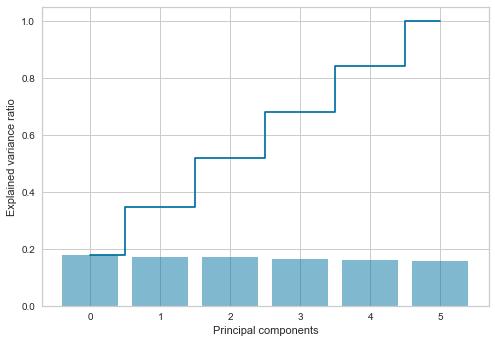

In [15]:
import numpy as np

plt.bar(range(6), pca_car.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(6), np.cumsum(pca_car.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

In [16]:
# Only 4 components
pca_car = PCA(n_components=4)
X_car_train_pca = pca_car.fit_transform(X_car_train_std)
print(pca_car)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)


In [17]:
X_car_test_pca = pca_car.transform(X_car_test_std)
print(X_car_test_pca.shape)

(519, 4)


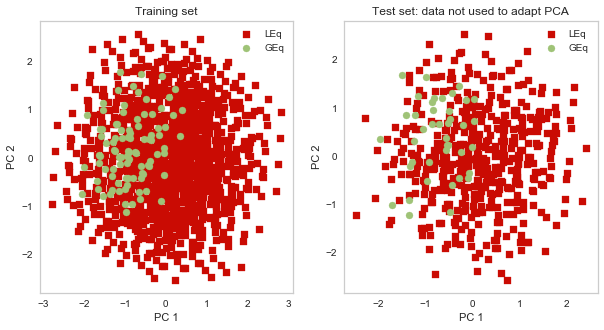

In [18]:
# os valores de Y variam entre 1 e 4
plt.rcParams.update({'font.size': 10})
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes = axes.ravel()   
ax = axes[0]
ax.figure
inx=(Y_car_train <= 2) # 1, 2
inx=inx.ravel()
ax.scatter(X_car_train_pca[inx,0],X_car_train_pca[inx,1],marker='s',color='r',label='LEq') # Less or Equal  

inx=(Y_car_train >= 3) # 3, 4
inx=inx.ravel()
ax.scatter(X_car_train_pca[inx,0],X_car_train_pca[inx,1],marker='o',color='g',label='GEq') # Great or Equal
ax.set_title("Training set")
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.legend()
ax.grid()

ax = axes[1]
ax.figure
inx=(Y_car_test <= 2) # 1, 2
inx=inx.ravel()
ax.scatter(X_car_test_pca[inx,0],X_car_test_pca[inx,1],marker='s',color='r',label='LEq')  
inx=(Y_car_test >= 3) # 3, 4
inx=inx.ravel()
ax.scatter(X_car_test_pca[inx,0],X_car_test_pca[inx,1],marker='o',color='g',label='GEq')
    
ax.set_title("Test set: data not used to adapt PCA")    

ax.legend() 
ax.grid()
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()


#### Car Kernel PCA

In [19]:
from sklearn.decomposition import KernelPCA

kpca_car = KernelPCA(n_components = 4, kernel= 'rbf', gamma=15)
X_skpca_car = kpca_car.fit_transform(X_car_train_std)
print(X_skpca_car.shape)

(1209, 4)


In [20]:
X_car_test_kpca = kpca_car.transform(X_car_test_std)
print(X_car_test_pca.shape)

(519, 4)


1160
1116


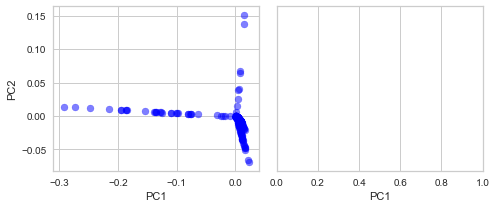

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
ax[0].scatter(X_skpca_car[Y_car_train == 0, 0], X_skpca_car[Y_car_train == 0, 1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_skpca_car[Y_car_train == 1, 0], X_skpca_car[Y_car_train == 1, 1], color='blue', marker='o', alpha=0.5)
inx = sum(Y_car_train != 4)
print(inx)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')

ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
#ax[1].scatter(X_skpca_car[labels_car == 0, 0], np.zeros((inx, 1)), color='red', marker='^', alpha=0.5)
#ax[1].scatter(X_skpca_car[labels_car == 1, 0], np.zeros((inx, 1)), color='blue', marker='o', alpha=0.5)
inx=sum(Y_car_train <= 2)
print(inx)

plt.tight_layout()
plt.show()

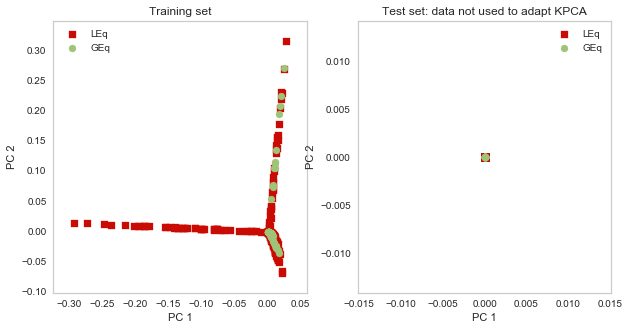

In [68]:

plt.rcParams.update({'font.size': 10})
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes = axes.ravel()   
ax = axes[0]
ax.figure
inx=(Y_car_train <= 2) # 1, 2
inx=inx.ravel()
ax.scatter(X_skpca_car[inx,0],X_skpca_car[inx,1],marker='s',color='r',label='LEq') # Less or Equal  

inx=(Y_car_train >= 3) # 3, 4
inx=inx.ravel()
ax.scatter(X_skpca_car[inx,0],X_skpca_car[inx,1],marker='o',color='g',label='GEq') # Great or Equal
ax.set_title("Training set")
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.legend()
ax.grid()

ax = axes[1]
ax.figure
inx=(Y_car_test <= 2) # 1, 2
inx=inx.ravel()
ax.scatter(X_car_test_kpca[inx,0],X_car_test_kpca[inx,1],marker='s',color='r',label='LEq')  
inx=(Y_car_test >= 3) # 3, 4
inx=inx.ravel()
ax.scatter(X_car_test_kpca[inx,0],X_car_test_kpca[inx,1],marker='o',color='g',label='GEq')
    
ax.set_title("Test set: data not used to adapt KPCA")    

ax.legend() 
ax.grid()
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

## Task B: Car Model training 

- [Car Dataset partition](#Car-Dataset-partition)
- [Car SVM classfiers](#Car-SVM-classifiers)
    - [Car SVM linear kernel](#Car-SVM-linear-kernel)
    - [Car SVM polynomial kernel](#Car-SVM-polynomial-kernel)
    - [Car SVM rbf kernel](#Car-SVM-rbf-kernel)
    - [Car SVM sigmoid kernel](#Car-SVM-sigmoid-kernel)
- [Car Multi-layer Perceptron](#Car-Multi-layer-Perceptron)
- [Car K-Nearest Neighbors](#Car-K-Nearest-Neighbors)
- [Car Decision tree](#Car-Decision-tree)
- [Car Random forest](#Car-Random-forest)
- [Car Gradient boosting](#Car-Gradient-boosting)
- [Car Preliminary results](#Car-Preliminary-results)

### Car Dataset partition

In [23]:
from sklearn.model_selection import train_test_split
#holdout dataset partition
# 70% of dataset used for training the model
# 30% of dataset used to test the model
test_frac = 0.3
X_train, X_test, Y_train, Y_test = train_test_split(X_train_std,labels_car, test_size = test_frac)

### Car SVM classifiers

#### Car SVM linear kernel

In [24]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc = SVC(kernel='linear', C=1.0)
svc.fit(X_train, Y_train)
predictions = svc.predict(X_test)
svm_lin_score = accuracy_score(Y_test, predictions)
print('Linear SVM Accuracy: {:.2%}'.format(svm_lin_score))

Linear SVM Accuracy: 84.78%


#### Car SVM polynomial kernel

In [25]:
svc = SVC(kernel='poly', degree=2, C=1.0)
svc.fit(X_train, Y_train)
predictions = svc.predict(X_test)
svm_poly_score = accuracy_score(Y_test, predictions)
print('Polynomial SVM Accuracy: {:.2%}'.format(svm_poly_score))

Polynomial SVM Accuracy: 71.87%


#### Car SVM rbf kernel

In [26]:
svc = SVC(kernel='rbf', C=1.0)
svc.fit(X_train, Y_train)
predictions = svc.predict(X_test)
svm_rbf_score = accuracy_score(Y_test, predictions)
print('RBF SVM Accuracy: {:.2%}'.format(svm_rbf_score))

RBF SVM Accuracy: 94.61%


#### Car SVM sigmoid kernel

In [27]:
svc = SVC(kernel='sigmoid', C=1.0)
svc.fit(X_train, Y_train)
predictions = svc.predict(X_test)
svm_sigm_score = accuracy_score(Y_test, predictions)
print('Sigmoid SVM Accuracy: {:.2%}'.format(svm_sigm_score))

Sigmoid SVM Accuracy: 74.18%


### Car Multi-layer Perceptron

In [28]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(activation='tanh', hidden_layer_sizes=(10,5),alpha=0.01, max_iter=5000)
mlp.fit(X_train, Y_train)
predictions = mlp.predict(X_test)
mlp_score = accuracy_score(Y_test, predictions)
print('MLP Accuracy: {:.2%}'.format(mlp_score))

MLP Accuracy: 97.30%


### Car K-Nearest Neighbors 

In [29]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2, weights='uniform')
predictions = knn.predict(X_test)
knn_score = accuracy_score(Y_test, predictions)
print("KNN Accuracy: {:.2%}".format(knn_score))

KNN Accuracy: 92.87%


### Car Decision tree

In [30]:
from sklearn import tree

tree = tree.DecisionTreeClassifier(criterion='gini')
tree.fit(X_train,Y_train)
tree_score = tree.score(X_test,Y_test)
print('Decision Tree Accuracy: {:.2%}'.format(tree_score))

Decision Tree Accuracy: 96.15%


### Car Random forest

In [31]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(max_depth=3, min_samples_split=5,n_estimators=10, max_features='log2', oob_score=False)	
forest.fit(X_train,Y_train)
rf_score = forest.score(X_test,Y_test)
print('Random Forest Accuracy: {:.2%}'.format(rf_score))

Random Forest Accuracy: 84.39%


### Car Gradient boosting

In [32]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
clf.fit(X_train, Y_train)
gb_score = clf.score(X_test, Y_test)  
print('Gradient Boosting Accuracy: {:.2%}'.format(gb_score))

Gradient Boosting Accuracy: 92.87%


### Car Preliminary results

In [33]:
from IPython.display import HTML, display

data = [['Classifier','Accuracy results'],
        ['SVM Linear', svm_lin_score],
        ['SVM Polynomial',svm_poly_score],
        ['SVM RBF',svm_rbf_score],
        ['SVM Sigmoid',svm_sigm_score],
        ['MLP', mlp_score],
        ['KNN', knn_score,],
        ['Decision tree', tree_score],
        ['Random forest', rf_score],
        ['Gradient boosting', gb_score]]

display(HTML(
    '<table><tr>{}</tr></table>'.format(
        '</tr><tr>'.join(
            '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in data)
)))

Classifier,Accuracy results
SVM Linear,0.847784200385
SVM Polynomial,0.718689788054
SVM RBF,0.946050096339
SVM Sigmoid,0.741811175337
MLP,0.97302504817
KNN,0.928709055877
Decision tree,0.961464354528
Random forest,0.843930635838
Gradient boosting,0.928709055877


# Dataset 2 : White wine quality dataset

## Task A: Wine Pre-processing 

- [Wine CSV's File Reading](#Wine-CSV's-File-Reading)
- [Wine Attributes and classes sample values](#Wine-Attributes-and-classes-sample-values)
- [Wine Class distribution visualization](#Wine-Class-distribution-visualization)
- [Wine Dataset detailed description](#Wine-Dataset-detailed-description)
- [Wine Attribute and class plotting examples](#Wine-Attribute-and-class-plotting-examples)
- [Wine Feature ranking (Shapiro-Wilk)](#Wine-Feature-ranking-(Shapiro-Wilk))
- [Wine feature scaling](#Wine-feature-scaling)
- [Wine dimension reduction](#Wine-dimension-reduction)
    - [Wine Principal Component Analysis (PCA)](#Wine-Principal-Component-Analysis-(PCA))
    - [Wine Kernel PCA](#Wine-Kernel-PCA)

### Wine CSV's File Reading

In [34]:
# Load dataframes from data set CSV files
dataset_white = pd.read_csv('./white_wine.csv') # numerical: https://archive.ics.uci.edu/ml/datasets/Wine+Quality

### Wine Attributes and classes sample values

In [35]:
dataset_white.head() # shows only the first 5 instances on the data set

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Wine Class distribution visualization

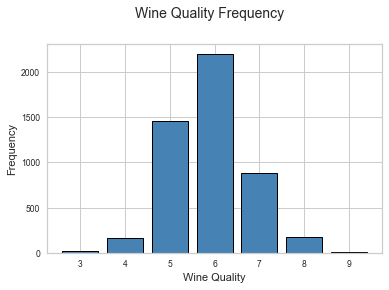

In [36]:
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Wine Quality Frequency", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Wine Quality")
ax.set_ylabel("Frequency") 
white_quality = dataset_white['quality'].value_counts()
white_quality = (list(white_quality.index), list(white_quality.values))
ax.tick_params(axis='both', which='major', labelsize=8.5)
bar = ax.bar(white_quality[0], white_quality[1], color='steelblue', 
        edgecolor='black', linewidth=1)

#plt.hist(dataset_white['quality'])
#plt.title('Wine dataset class distribution')
#plt.show()

### Wine Dataset detailed description

Dataset description
         fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000        

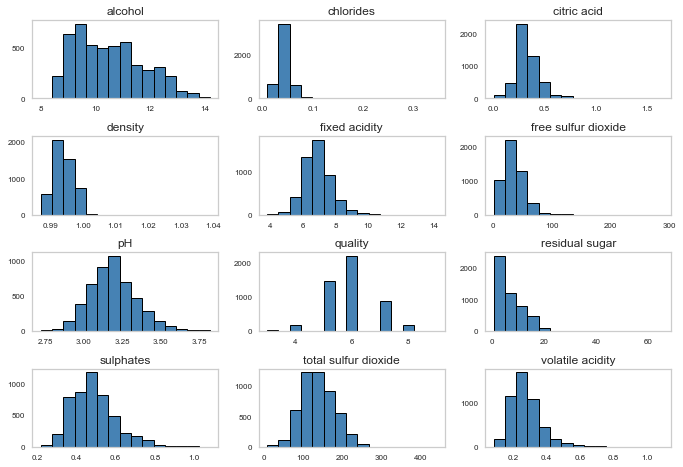

In [37]:
# Visualizing data in One Dimension(1-D)
print("Dataset description\n ", dataset_white.describe())
print()

dataset_white.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,xlabelsize=8, ylabelsize=8, grid=False)
plt.tight_layout(rect=(0, 0, 1.2, 1.2))

### Correlation matrix heatmap

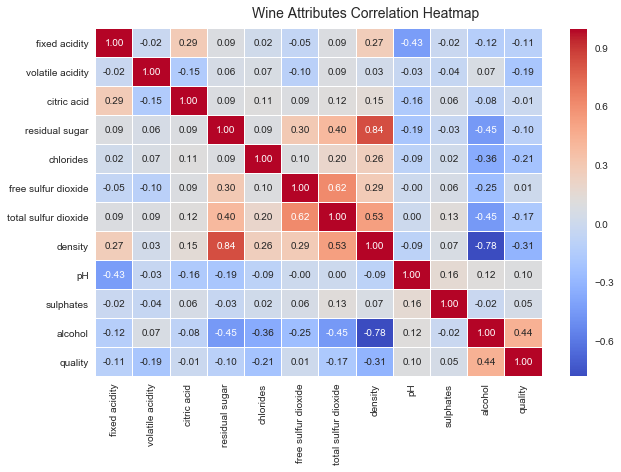

In [38]:
# Visualizing data in Two Dimensions (2-D)

# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(10, 6))
corr = dataset_white.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Wine Attributes Correlation Heatmap', fontsize=14)

### Wine Attribute and class plotting examples

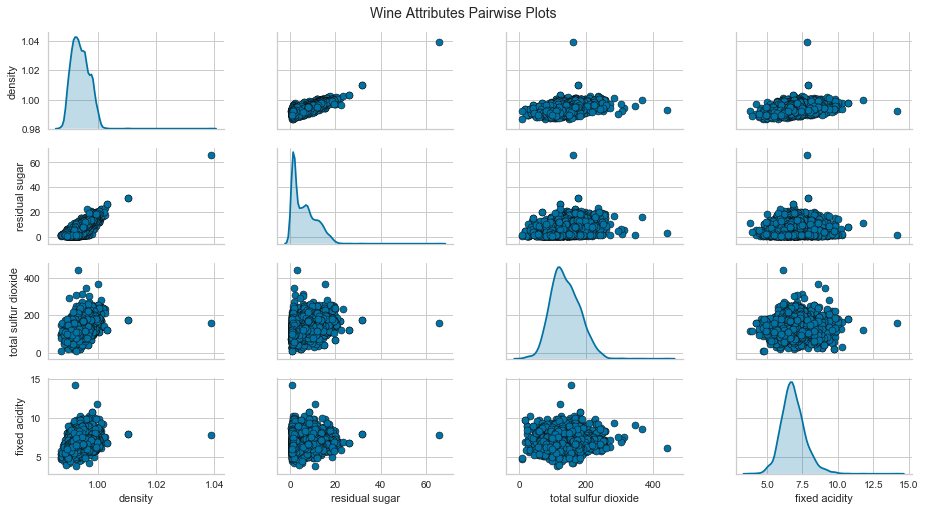

In [39]:
labels_wine = dataset_white.as_matrix(columns=[dataset_white.columns[-1]]) # Y
attributes_wine = dataset_white.as_matrix(columns=dataset_white.columns[0:11]) # X
labels_wine = labels_wine.reshape(labels_wine.size)

# Pair-wise Scatter Plots
cols = ['density', 'residual sugar', 'total sulfur dioxide', 'fixed acidity']
pp = sns.pairplot(dataset_white[cols], size=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Wine Attributes Pairwise Plots', fontsize=14)

### Wine Feature ranking (Shapiro-Wilk)

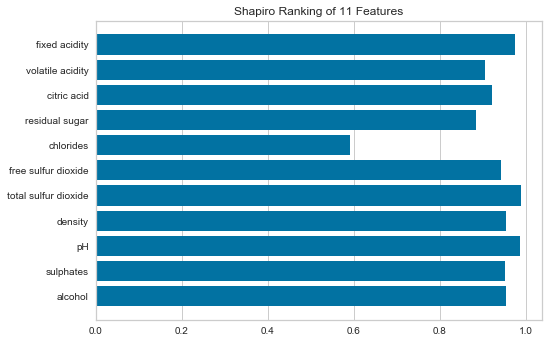

In [40]:
features = list(dataset_white.columns[0:11])
# Instantiate the 1D visualizer with the Sharpiro ranking algorithm
visualizer = Rank1D(features=features, algorithm='shapiro')
visualizer.fit(attributes_wine, labels_wine)	# Fit the data to the visualizer
visualizer.transform(attributes_wine)	# Transform the data
visualizer.poof()

### Wine feature scaling

In [41]:
sc = StandardScaler()
sc.fit(attributes_wine)
X_white_train_std = sc.transform(attributes_wine)

### Wine dimension reduction

#### Wine Principal Component Analysis (PCA)

In [42]:
X_wine_train, X_wine_test, Y_wine_train, Y_wine_test = \
    train_test_split(attributes_wine, labels_wine, test_size=0.3, random_state=0)

In [43]:
sc = StandardScaler()
X_wine_train_std = sc.fit_transform(X_wine_train)
X_wine_test_std = sc.transform(X_wine_test)

In [44]:
pca_wine = PCA()
X_wine_train_pca = pca_wine.fit_transform(X_wine_train_std)

pca_wine.explained_variance_ratio_

# Aqui podes ver o peso dos principais componentes ordenados por ordem decrescente do conjunto
# Como podes ver, nao há pelo menos dois PC's em que a soma delas seja por exemplo 90%, pelo que se se diminuir
# para 2 componentes vai ser 0.2968005 + 0.14152228 = 43.8 %
# Desta forma, o PCA nao vai funcionar muito bem como podes reparar em baixo nos 2 graficos

array([ 0.2968005 ,  0.14152228,  0.11156618,  0.09484842,  0.0869572 ,
        0.08356054,  0.06607424,  0.05441625,  0.03669958,  0.02627999,
        0.00127482])

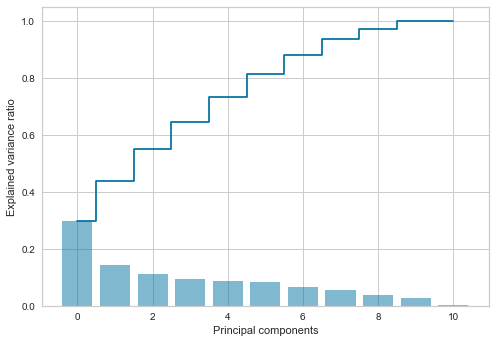

In [45]:
plt.bar(range(11), pca_wine.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(11), np.cumsum(pca_wine.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

In [46]:
# Only two components for illustration
pca_wine = PCA(n_components=5)
X_wine_train_pca = pca_wine.fit_transform(X_wine_train_std)
print(pca_wine)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)


In [47]:
X_wine_test_pca = pca_wine.transform(X_wine_test_std)

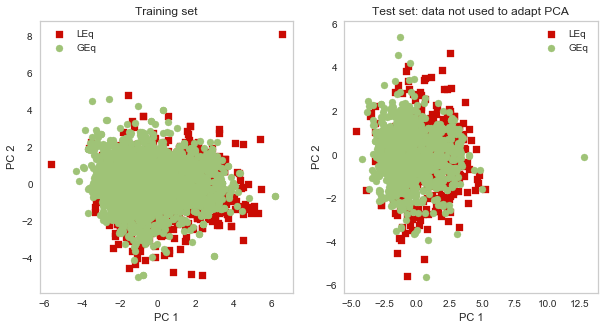

In [67]:
# os valores de Y variam entre 0 e 10

plt.rcParams.update({'font.size': 10})
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes = axes.ravel()   
ax = axes[0]
ax.figure
inx=(Y_wine_train <= 5) # 1, 2, 3, 4, 5
inx=inx.ravel()
ax.scatter(X_wine_train_pca[inx,0],X_wine_train_pca[inx,1],marker='s',color='r',label='LEq') # Less or Equal  

inx=(Y_wine_train >= 6) # 6, 7, 8, 9, 10
inx=inx.ravel()
ax.scatter(X_wine_train_pca[inx,0],X_wine_train_pca[inx,1],marker='o',color='g',label='GEq') # Great or Equal
ax.set_title("Training set")
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.legend()
ax.grid()

ax = axes[1]
ax.figure
inx=(Y_wine_test <= 5) # 1, 2, 3, 4, 5
inx=inx.ravel()
ax.scatter(X_wine_test_pca[inx,0],X_wine_test_pca[inx,1],marker='s',color='r',label='LEq')  
inx=(Y_wine_test >= 6) # 6, 7, 8, 9, 10
inx=inx.ravel()
ax.scatter(X_wine_test_pca[inx,0],X_wine_test_pca[inx,1],marker='o',color='g',label='GEq')
    
ax.set_title("Test set: data not used to adapt PCA")    

ax.legend() 
ax.grid()
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

#### Wine Kernel PCA

In [49]:
kpca_wine = KernelPCA(n_components = 5, kernel= 'rbf', gamma=15)
X_skpca_wine = kpca_wine.fit_transform(X_wine_train_std)
print(X_skpca_wine.shape)

(3428, 5)


In [50]:
X_wine_test_kpca = kpca_wine.transform(X_wine_test_std)
print(X_wine_test_pca.shape)

(1470, 5)


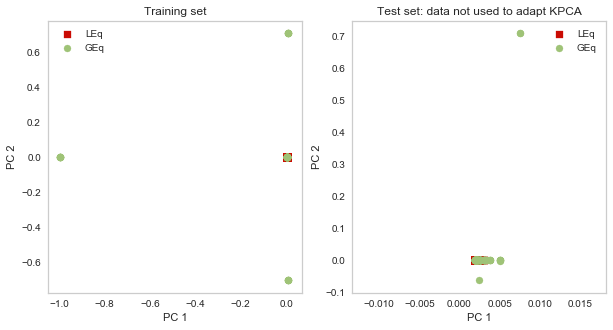

In [66]:
plt.rcParams.update({'font.size': 10})
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes = axes.ravel()   
ax = axes[0]
ax.figure
inx=(Y_wine_train <= 5) # 1, 2, 3, 4, 5
inx=inx.ravel()
ax.scatter(X_skpca_wine[inx,0],X_skpca_wine[inx,1],marker='s',color='r',label='LEq') # Less or Equal  

inx=(Y_wine_train >= 6) # 6, 7, 8, 9, 10 
inx=inx.ravel()
ax.scatter(X_skpca_wine[inx,0],X_skpca_wine[inx,1],marker='o',color='g',label='GEq') # Great or Equal
ax.set_title("Training set")
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.legend()
ax.grid()

ax = axes[1]
ax.figure
inx=(Y_wine_test <= 5) # 1, 2, 3, 4, 5
inx=inx.ravel()
ax.scatter(X_wine_test_kpca[inx,0],X_wine_test_kpca[inx,1],marker='s',color='r',label='LEq')  
inx=(Y_wine_test >= 6) # 6, 7, 8, 9, 10 
inx=inx.ravel()
ax.scatter(X_wine_test_kpca[inx,0],X_wine_test_kpca[inx,1],marker='o',color='g',label='GEq')
    
ax.set_title("Test set: data not used to adapt KPCA")    

ax.legend() 
ax.grid()
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

## Task B: Wine Model Training

- [Wine Dataset partition](#Wine-Dataset-partition)
- [Wine SVM classfiers](#Wine-SVM-classifiers)
    - [Wine SVM linear kernel](#Wine-SVM-linear-kernel)
    - [Wine SVM polynomial kernel](#Wine-SVM-polynomial-kernel)
    - [Wine SVM rbf kernel](#Wine-SVM-rbf-kernel)
    - [Wine SVM sigmoid kernel](#Wine-SVM-sigmoid-kernel)
- [Wine Multi-layer Perceptron](#Wine-Multi-layer-Perceptron)
- [Wine K-Nearest Neighbors](#Wine-K-Nearest-Neighbors)
- [Wine Decision tree](#Wine-Decision-tree)
- [Wine Random forest](#Wine-Random-forest)
- [Wine Gradient boosting](#Wine-Gradient-boosting)
- [Wine Preliminary results](#Wine-Preliminary-results)

### Wine Dataset partition

In [52]:
X_white_train, X_white_test, Y_white_train, Y_white_test = \
    train_test_split(X_white_train_std, labels_wine, test_size = test_frac)

### Wine SVM classfiers

#### Wine SVM linear kernel

In [53]:
svc = SVC(kernel='linear', C=1.0)
svc.fit(X_white_train, Y_white_train)
predictions = svc.predict(X_white_test)
svm_lin_score = accuracy_score(Y_white_test, predictions)
print('Linear SVM Accuracy: {:.2%}'.format(svm_lin_score))

Linear SVM Accuracy: 53.67%


#### Wine SVM polynomial kernel

In [54]:
svc = SVC(kernel='poly', degree=2, C=1.0)
svc.fit(X_white_train, Y_white_train)
predictions = svc.predict(X_white_test)
svm_poly_score = accuracy_score(Y_white_test, predictions)
print('Polynomial SVM Accuracy: {:.2%}'.format(svm_poly_score))

Polynomial SVM Accuracy: 51.02%


#### Wine SVM rbf kernel

In [55]:
svc = SVC(kernel='rbf', C=1.0)
svc.fit(X_white_train, Y_white_train)
predictions = svc.predict(X_white_test)
svm_rbf_score = accuracy_score(Y_white_test, predictions)
print('RBF SVM Accuracy: {:.2%}'.format(svm_rbf_score))

RBF SVM Accuracy: 58.64%


#### Wine SVM sigmoid kernel

In [56]:
svc = SVC(kernel='sigmoid', C=1.0)
svc.fit(X_white_train, Y_white_train)
predictions = svc.predict(X_white_test)
svm_sigm_score = accuracy_score(Y_white_test, predictions)
print('Sigmoid SVM Accuracy: {:.2%}'.format(svm_sigm_score))

Sigmoid SVM Accuracy: 43.20%


### Wine Multi-layer Perceptron

In [57]:
mlp = MLPClassifier(activation='tanh', hidden_layer_sizes=(10,5),alpha=0.01, max_iter=5000)
mlp.fit(X_white_train, Y_white_train)
predictions = mlp.predict(X_white_test)
mlp_score = accuracy_score(Y_white_test, predictions)
print('MLP Accuracy: {:.2%}'.format(mlp_score))

MLP Accuracy: 56.12%


### Wine K-Nearest Neighbors

In [58]:
knn = KNeighborsClassifier()
knn.fit(X_white_train, Y_white_train)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2, weights='uniform')
predictions = knn.predict(X_white_test)
knn_score = accuracy_score(Y_white_test, predictions)
print("KNN Accuracy: {:.2%}".format(knn_score))

KNN Accuracy: 56.33%


### Wine Decision tree

In [59]:
from sklearn import tree

tree = tree.DecisionTreeClassifier(criterion='gini')
tree.fit(X_white_train,Y_white_train)
tree_score = tree.score(X_white_test,Y_white_test)
print('Decision Tree Accuracy: {:.2%}'.format(tree_score))

Decision Tree Accuracy: 60.68%


### Wine Random forest

In [60]:
forest = RandomForestClassifier(max_depth=3, min_samples_split=5,n_estimators=10, max_features='log2', oob_score=False)	
forest.fit(X_white_train,Y_white_train)
rf_score = forest.score(X_white_test,Y_white_test)
print('Random Forest Accuracy: {:.2%}'.format(rf_score))

Random Forest Accuracy: 52.79%


### Wine Gradient boosting

In [61]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
clf.fit(X_white_train, Y_white_train)
gb_score = clf.score(X_white_test, Y_white_test)  
print('Gradient Boosting Accuracy: {:.2%}'.format(gb_score))

Gradient Boosting Accuracy: 55.17%


### Wine Preliminary results

In [62]:
data = [['Classifier','Accuracy results'],
        ['SVM Linear', svm_lin_score],
        ['SVM Polynomial',svm_poly_score],
        ['SVM RBF',svm_rbf_score],
        ['SVM Sigmoid',svm_sigm_score],
        ['MLP', mlp_score],
        ['KNN', knn_score,],
        ['Decision tree', tree_score],
        ['Random forest', rf_score],
        ['Gradient boosting', gb_score]]


display(HTML(
    '<table><tr>{}</tr></table>'.format(
        '</tr><tr>'.join(
            '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in data)
)))

Classifier,Accuracy results
SVM Linear,0.536734693878
SVM Polynomial,0.510204081633
SVM RBF,0.586394557823
SVM Sigmoid,0.431972789116
MLP,0.561224489796
KNN,0.563265306122
Decision tree,0.606802721088
Random forest,0.527891156463
Gradient boosting,0.551700680272
